<a href="https://colab.research.google.com/github/eliu9395/AI/blob/main/TimeSeries_3_TI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technique Index, TI
---
To analyze the financial data, using yahoo's data  is not enough; we need more `features`, i.e. TI.

To add more TI's, install C-pachage, ta, in google drive, the linux-based platform, as follows:
1. dawnload ans install ta-lib/ta-lib-0.4.0-src.tar.gz,
2. install Python-wrapped ta package, `Ta-Lib`



In [ ]:
!uname -a

Linux 42a1e1267d7f 6.1.85+ #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
!ls -a ..

.	 cuda-keyring_1.0-1_all.deb  home    libx32		       proc	   srv	  var
..	 datalab		     kaggle  media		       python-apt  sys
bin	 dev			     lib     mnt		       root	   tmp
boot	 .dockerenv		     lib32   NGC-DL-CONTAINER-LICENSE  run	   tools
content  etc			     lib64   opt		       sbin	   usr


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2024-07-20 01:32:46--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-07-20 01:32:46--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-07-20 01:32:46--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

ModuleNotFoundError: No module named 'talib'

In [ ]:
# or just install the binary package
!pip install ta-lib-bin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.7 MB/s eta 0:00:00


In [ ]:
!ls /usr/local/lib/python3.10/dist-packages/talib

abstract.py    __pycache__				test_abstract.py  test_pandas.py
deprecated.py  stream.py				test_data.py	  test_polars.py
__init__.py    _ta_lib.cpython-310-x86_64-linux-gnu.so	test_func.py	  test_stream.py


In [ ]:
import yfinance as yf
import talib
import matplotlib.pyplot as plt

In [ ]:
ticker='IONQ'
begin='2024-01-01'
df = yf.download(ticker, begin)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#      list first 5 elements
df.head(2)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,12.35,12.59,12.10,12.16,12.16,5951100
2024-01-03,11.81,12.09,11.77,11.93,11.93,6225700


In [ ]:
# Simple Moving Average, SMA
# add 20 days moving average
df[f'{ticker}_sma_22'] = talib.SMA(df['Close'].values, timeperiod=22)

In [ ]:
df[f'{ticker}_sma_20'] = talib.SMA(df['Close'].values, timeperiod=20)

In [ ]:
df[f'{ticker}_sma_5'] = talib.SMA(df['Close'].values, timeperiod=5)

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,IONQ_sma_22,IONQ_sma_5,IONQ_sma_20
Date,,,,,,,,,
2024-07-25,7.57,8.155,7.48,7.93,7.93,4338900,7.756364,7.872,7.8660
2024-07-26,8.12,8.270,7.82,8.21,8.21,4307800,7.830000,8.028,7.9215
2024-07-29,8.34,8.440,7.80,7.89,7.89,3420300,7.882727,7.990,7.9645
2024-07-30,7.94,8.000,7.61,7.80,7.80,3040900,7.914545,7.890,8.0125
2024-07-31,7.98,8.465,7.92,8.15,8.15,4199500,7.965455,7.996,8.0630


In [ ]:
df["Close"];

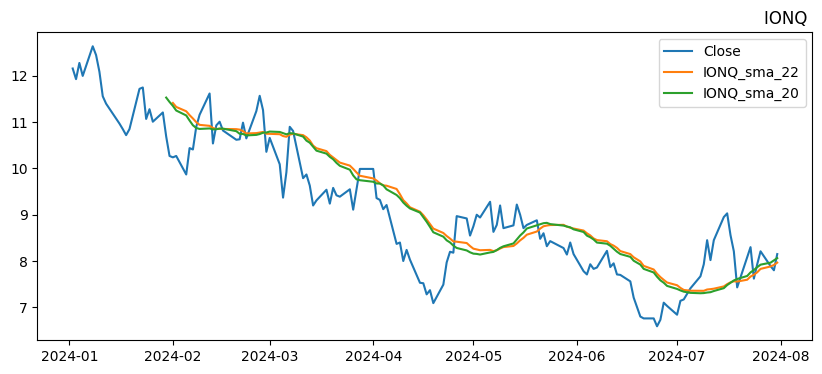

In [ ]:
fig,ax = plt.subplots(figsize=(10,4))

ax.set_title(f"{ticker} ",loc="right")
ax.plot(df['Close'],label='Close')
ax.plot(df[f'{ticker}_sma_22'],label=f'{ticker}_sma_22')
ax.plot(df[f'{ticker}_sma_20'],label=f'{ticker}_sma_20')

ax.legend()

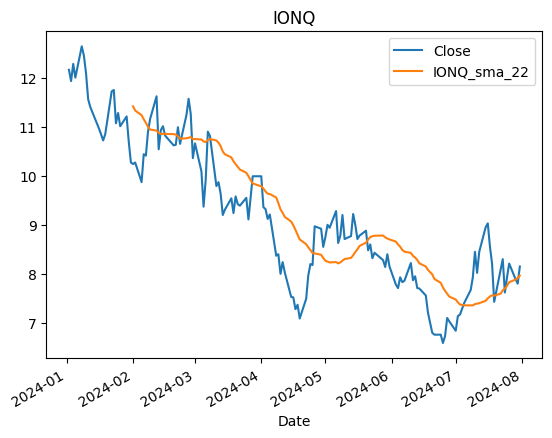

In [ ]:
# SMA makes the `Close` curve smoothly
df[['Close', f'{ticker}_sma_22']].plot(title=f"{ticker}");

In [ ]:
import seaborn as sns

# Seaborn style set
sns.set(style="whitegrid")

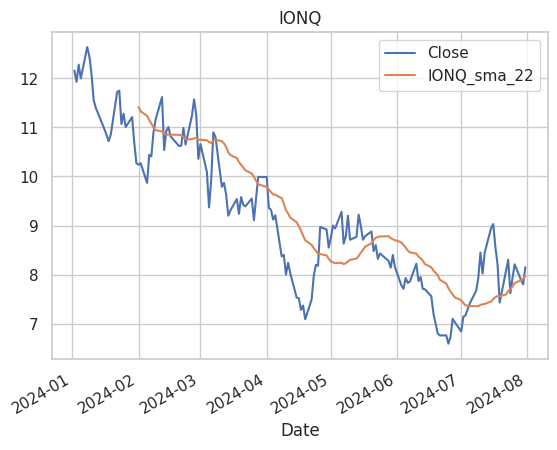

In [ ]:
df[['Close', f'{ticker}_sma_22']].plot(title=f"{ticker}");

In [ ]:
df.columns

In [ ]:
list(df.columns)

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'IONQ_sma_22',
 'IONQ_sma_5',
 'IONQ_sma_20']

In [ ]:
#import string as str
[str.lower(col) for col in list(df.columns)]

In [ ]:
def df_lower(df):
  df.columns = [str.lower(col) for col in list(df.columns)]
  return df
df1=df_lower(df)

In [ ]:
df1.head(2)

,open,high,low,close,adj close,volume,ionq_sma_22,ionq_sma_5,ionq_sma_20
Date,,,,,,,,,
2024-01-02,12.35,12.59,12.10,12.16,12.16,5951100,NaN,NaN,NaN
2024-01-03,11.81,12.09,11.77,11.93,11.93,6225700,NaN,NaN,NaN


KD
---
1. `RSV`, Raw Stockastic Variable,
$$ \text{ RSV }_t = \frac{\text{Today}_{\text{Close}} - \text{Lowest}_t}{\text{Highest}_t- \text{Lowest}_t} $$
2. KD
\begin{align*}
 K_t &=& \frac{2}{3}K_{t-1}+\frac{1}{3}\text{RSV}_t\\
D_t &=& \frac{2}{3}D_{t-1}+\frac{1}{3}K_t
\end{align*}
1. K can be treated as fast line, and the other as slow line.
2. 1/2 treated if none of K, D defined.

In [ ]:
from talib import abstract

df_kd=abstract.STOCH(df1, fastk_period=9, slowk_period=3, slowd_period=3)


In [ ]:
df['slowk']=df_kd['slowk']
df['slowd']=df_kd['slowd']

In [ ]:
df_kd.tail(2)

,slowk,slowd
Date,,
2024-07-30,37.672650,36.481309
2024-07-31,44.750261,40.485366


In [ ]:
import seaborn as sns
sns.set()

<Axes: xlabel='Date'>

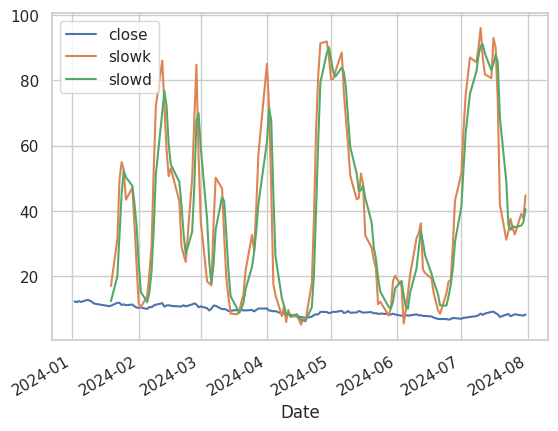

In [ ]:
# plot cloase with kd curve
df1[['close', 'slowk', 'slowd']].plot()

Actually, `Close` and `KD` are two plots in different consideration. Note that K,D are within 0-100.

**Note**, we can generate the python code by LLM, such as [Claude](claude.ai), [GROQ](groq.com), if we actually know how and what we want to do. Before you use LLM's, learn the knowledge first.

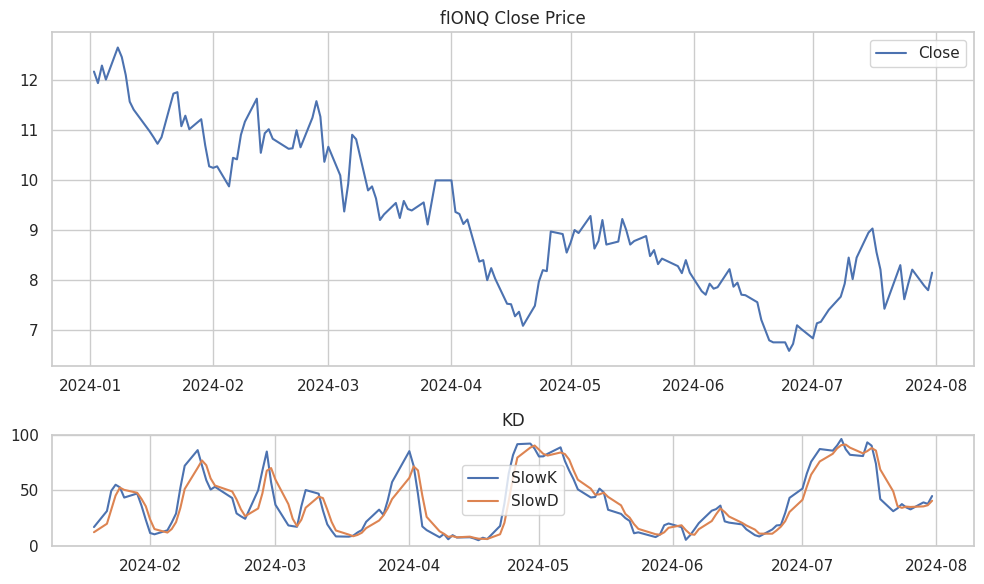

In [ ]:
# prompt: make close cureve with subplot kd curve

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6),gridspec_kw={'height_ratios': [3, 1]},)

# Plot the close price on the first subplot
ax1.plot(df['close'], label='Close')
ax1.set_title(f'f{ticker} Close Price')
ax1.grid(True)
ax1.legend()

# Plot the slowk and slowd curves on the second subplot
ax2.plot(df['slowk'], label='SlowK')
ax2.plot(df['slowd'], label='SlowD')
ax2.set_title('KD')
ax2.set_ylim(0, 100)
ax2.grid(True)
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.show()


Enhance TA on Pandas
---

[code](https://medium.com/@kokhua81/stocks-technical-analysis-ta-with-python-chatgpt-a-comprehensive-guide-871a756ebc7c)

In [ ]:
!pip install -q pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
#import pandas as pd
#import yfinance as yf
import pandas_ta as ta
#import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

1. MACD, Moving Average Convergence / Divergence,  

In [ ]:
# Calculate technical indicators using pandas-ta
df.ta.macd(append=True)
df.ta.rsi(append=True)
df.ta.bbands(append=True)
df.ta.obv(append=True)

In [ ]:
df.tail()

EMA: weighted moving average
$$ EMA_k(t)=X(t)⋅ k+ EMA_k(t-1)\cdot (1-p)$$
- $p=1/(k+1)$

In [ ]:
df.ta.sma(length=20, append=True);
df.ta.ema(length=50, append=True);

In [ ]:
df.head(2)

In [ ]:
# Price Trend Chart
#plt.subplot(3, 3, 1)
plt.plot(df.index, df['close'], label='Close', color='blue')
plt.plot(df.index, df['EMA_50'], label='EMA 50', color='green')
plt.plot(df.index, df['SMA_20'], label='SMA_20', color='orange')
plt.title("Price Trend")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()



In [ ]:
df.tail()

MACD helps investors identify price trends:

$$MACD= EMA_{12} − EMA_{26}$$

In [ ]:
# MACD Plot
#plt.subplot(3, 3, 3)
plt.plot(df['MACD_12_26_9'], label='MACD')
plt.plot(df['MACDh_12_26_9'], label='MACD Histogram')
plt.title('MACD Indicator')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.title("MACD")
plt.legend()

RSI, Relative Strength Index,Indicator
---
 Explained With Formula, over-bought(too hot), over-sold.

In [ ]:
#plt.subplot(3, 3, 4)
plt.plot(df['RSI_14'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.title('RSI Indicator')


Bollinger Bands
---
$$ SMA_t\pm 1.5\sigma$$
Long, Medium, Shot termsm $t=50,20,10$
1. Long term: 50 day moving average, bands at 2.5 standard deviations. (2.5 times the standard dev. +/- the SMA),
2. Medium term: 20 day moving average, bands at 2 standard deviations.

3. Short term: 10 day moving average, bands at 1.5 standard deviations.



In [ ]:
# Bollinger Bands Plot
plt.figure(figsize=(8, 4))
#plt.subplot(3, 3, 5)
plt.plot(df.index, df['BBU_5_2.0'], label='Upper BB')
#plt.plot(df.index, df['BBM_5_2.0'], label='Middle BB')
plt.plot(df.index, df['BBL_5_2.0'], label='Lower BB')
plt.plot(df.index, df['close'], label='Adj Close', color='brown')

#plt.fill_between(df.index, df['BBU_5_2.0'], df['BBL_5_2.0'],  alpha=0.3)
plt.title(f"{ticker}\'s Bollinger Bands")

plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()
